<a href="https://colab.research.google.com/github/SylwiaNowakowska/Convolutional_Neural_Networks_Ophthalmology/blob/master/01_EDA_Dataset_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ocular Disease Recognition Dataset - Exploratory Data Analysis


Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.

Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

*   Normal (N)
*   Diabetes (D)
*   Glaucoma (G)
*   Cataract (C)
*   Age related Macular Degeneration (A)
*   Hypertension (H)
*   Pathological Myopia (M)
*   Other diseases/abnormalities (O)

Link to the dataset: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k

## Imports and parameters setting

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import GroupShuffleSplit

In [ ]:
dataset_path = '/content/drive/Othercomputers/Laptop SYLWIA/SYLWIA/AI DATASETS/Ophthalmology ODIR/full_df.csv'
images_folder_path = '/content/drive/Othercomputers/Laptop SYLWIA/SYLWIA/AI DATASETS/Ophthalmology ODIR/preprocessed_images'

random_state = 16

## Dataset EDA

In [ ]:
labels_dict = {"['N']" : 'Normal', 
               "['D']" : 'Diabetes',
               "['G']" : 'Glaucoma',
               "['C']" : 'Cataract',
               "['A']" : 'Age related Macular Degeneration',
               "['H']" : 'Hypertension',
               "['M']" : 'Pathological Myopia',
               "['O']" : 'Other diseases/abnormalities'}

dataset_df = pd.read_csv(dataset_path)
dataset_df['labels_descriptive'] = dataset_df['labels'].map(labels_dict)
dataset_df = dataset_df.drop(columns=['filepath'])
dataset_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,target,filename,labels_descriptive
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


In [ ]:
number_patients = dataset_df['ID'].nunique()
number_photos = dataset_df['filename'].nunique()
print(f'There are {number_patients} patients in the dataset')
print(f'There are {number_photos} fundus phtotographs.')

There are 3358 patients in the dataset
There are 6392 fundus phtotographs.


In [ ]:
def plot_classes_distribution(df, class_column, figure_title=None, figsize=(6, 3)):

    plt.rcParams.update({'font.size': 14})
    fig, axs = plt.subplots(1,1, figsize=figsize)
    
    if figure_title:
        fig.suptitle(figure_title, fontsize=16, y = 1, x = 0.52)
        
    df_value_counts = df[class_column].value_counts().sort_index()
    axs.bar(df_value_counts.index, df_value_counts, alpha=0.7) 
    axs.xaxis.set_major_locator(MaxNLocator(integer=True)) 
    axs.tick_params(axis='x', rotation=90)   
    plt.show()
    
    return df_value_counts


def explore_each_class(df, class_column, images_folder_path, sample_size=6):
    categories = sorted(df[class_column].unique())

    for i, category in enumerate(categories):
        sub_df = df[df[class_column] == category]
        sample_df = sub_df.sample(sample_size, random_state=random_state)
        filenames = sample_df['filename'].tolist()

        fig, axs = plt.subplots(1, sample_size, figsize=(25, 5))
        fig.suptitle(category, fontsize=16, y = 0.9, x = 0.50)
        
        for j, image in enumerate(filenames):
            image_path = os.path.join(images_folder_path, image)
            image_array = plt.imread(image_path)
            axs[j].imshow(image_array)
            axs[j].axis('off')
            axs[j].set_title(image, fontsize=12)
        plt.show()

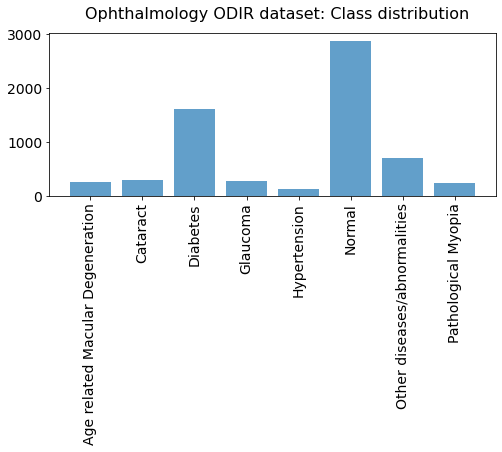

Age related Macular Degeneration     266
Cataract                             293
Diabetes                            1608
Glaucoma                             284
Hypertension                         128
Normal                              2873
Other diseases/abnormalities         708
Pathological Myopia                  232
Name: labels_descriptive, dtype: int64

In [ ]:
category_value_counts = plot_classes_distribution(dataset_df, class_column='labels_descriptive', 
                          figure_title='Ophthalmology ODIR dataset: Class distribution', figsize=(8,3))
category_value_counts

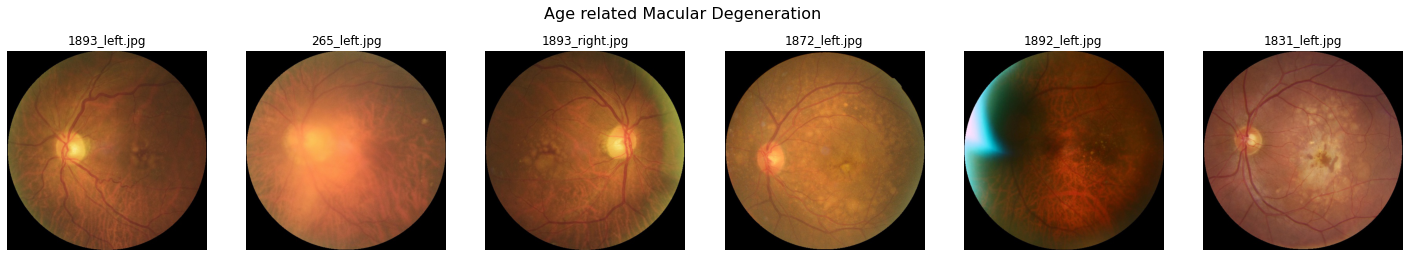

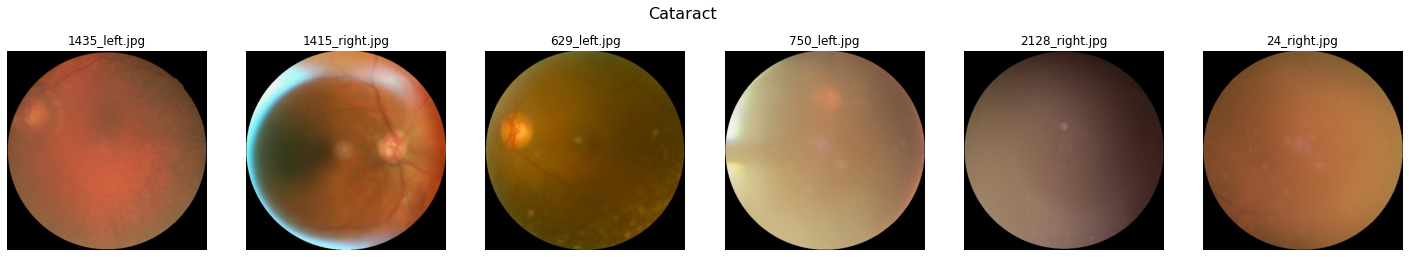

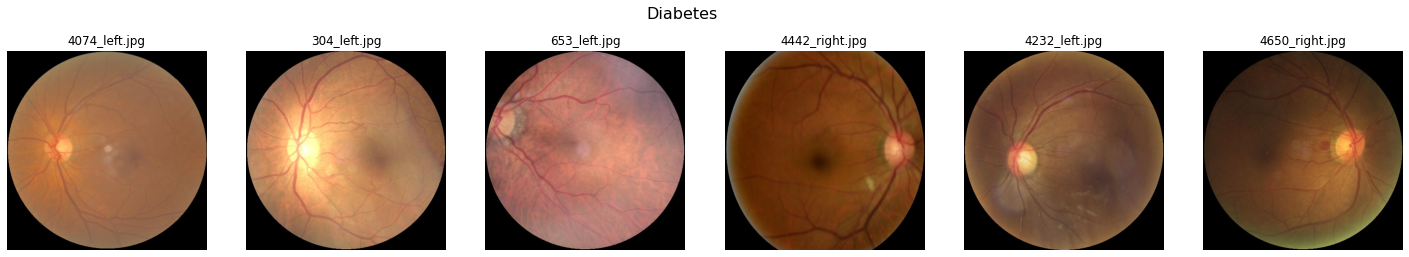

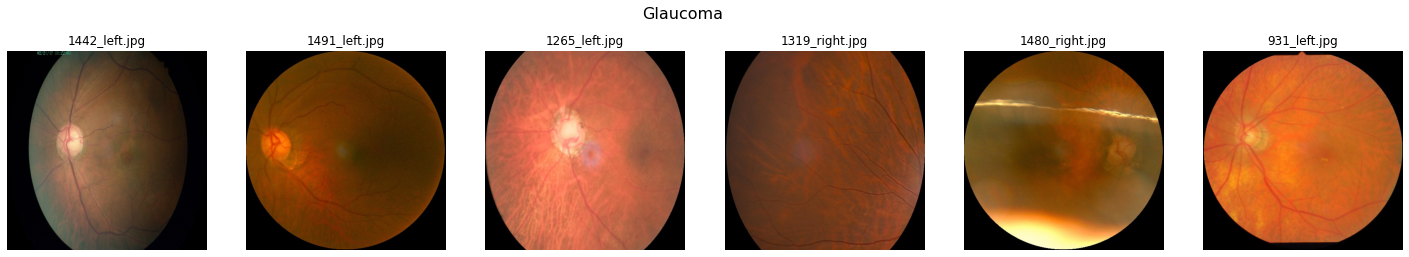

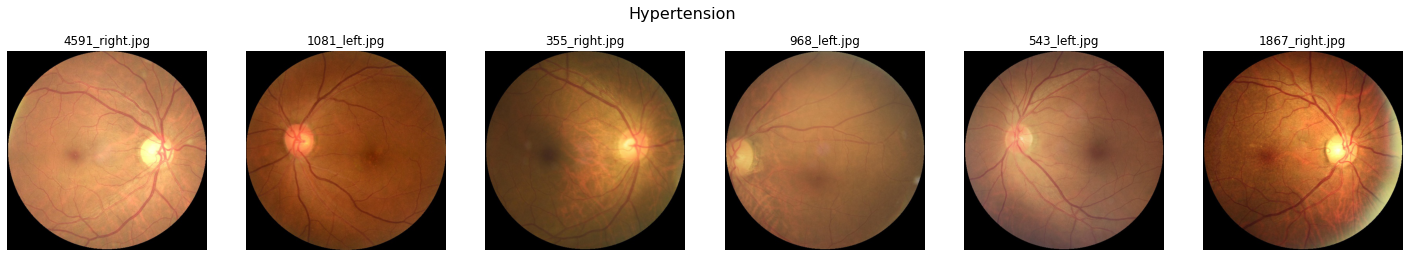

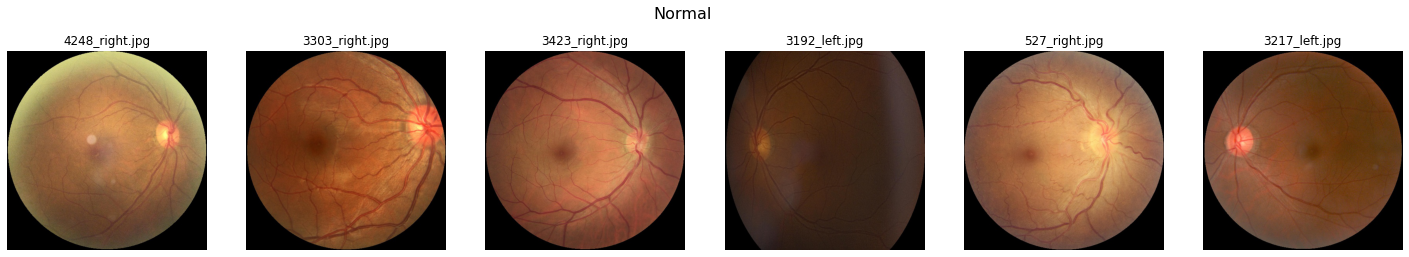

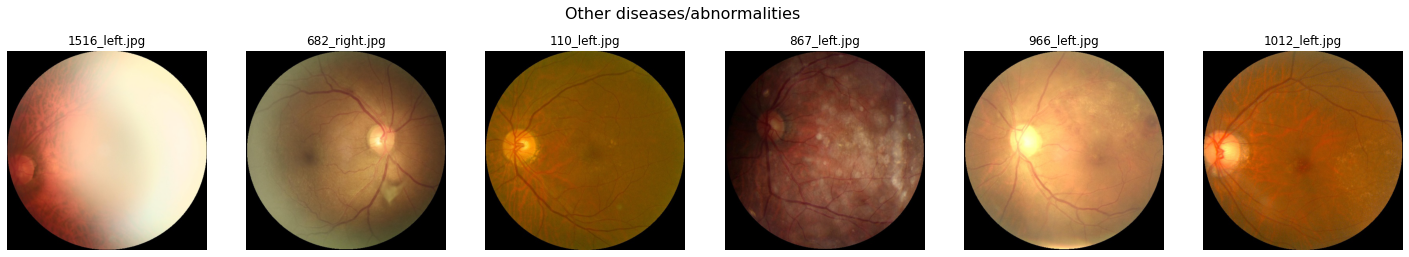

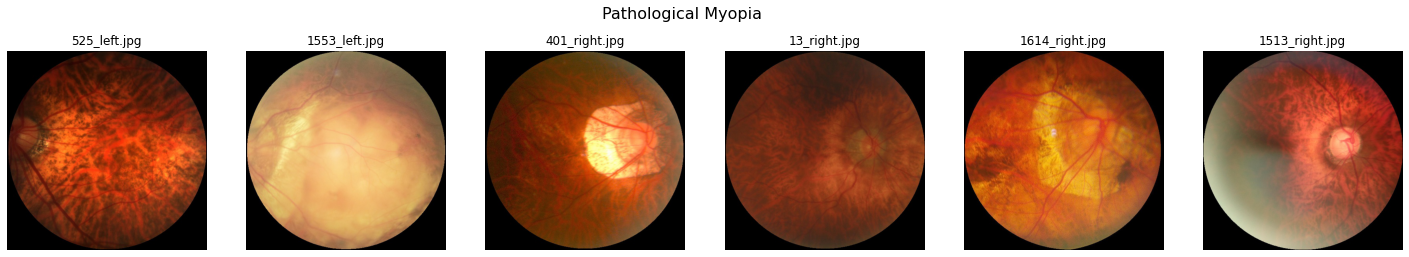

In [ ]:
explore_each_class(dataset_df, 'labels_descriptive', images_folder_path=images_folder_path )

## Dataset Splitting

### Functions for patients stratified dataset splitting with categories ratio control

In [ ]:
def split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=0.20, test_size=0.20, random_state=16, verbose=True):
    
    """
    Function splitting the dataset into train and test or into train, valid and test splits with patient strafification.
    Args:
        dataset_df (dataframe): dataset dataframe
        patient_column (str): column in dataset_df identifying the patient
        slice_id_column (str): column in dataset_df uniquely identifying each slice
        valid_size (float between 0 and 1) percentage of slices in the valid split, if equal to 0, then the dataset will be spit in train and test
        test_size (float between 0 and 1) percentage of slices in the test split
        random_state (int): random seed
        verbose (bool): if True: printing info to ensure that the splits are done correctly
    Returns:
        inds [list of numpy arrays]: numpy array with indices for each split
    """
    
    # split the dataset into two parts
    train_valid_inds, test_inds = next(GroupShuffleSplit(test_size=test_size, n_splits=1, random_state=random_state).split(dataset_df, groups=dataset_df[patient_column]))

    # if there is no valid_size, return the indices
    if valid_size == 0:
        inds = [train_valid_inds, test_inds]
        
        if verbose:
            # Confirming that there is no Slice_idx overlap between the datasets
            print(f'Slice ID overlap between train and test datasets: {np.intersect1d(np.unique(train_valid_inds), np.unique(test_inds))}')
    
            # Confirming that there is no Patient_ID overlap between the datasets
            train_valid_patient_IDs = dataset_df.loc[train_valid_inds, patient_column].to_numpy()
            test_patient_IDs = dataset_df.loc[test_inds, patient_column].to_numpy()
            print(f'Patient ID overlap between train and test datasets: {np.intersect1d(np.unique(train_valid_patient_IDs), np.unique(test_patient_IDs))}\n') 
            

    # if there is valid_size prepare the data for further splitting    
    else:       
        # reset indices for further spitting
        train_valid_df = dataset_df.loc[train_valid_inds]
        test_df = dataset_df.loc[test_inds]

        train_valid_df.reset_index(inplace=True, drop=True)
        test_df.reset_index(inplace=True, drop=True)

        # calculate valid_size with respect to train_valid_df
        valid_size_recalculated = valid_size * len(dataset_df) / len(train_valid_df)

        # split the train_valid datatset into train and valid, reset index
        train_inds, valid_inds = next(GroupShuffleSplit(test_size=valid_size_recalculated, n_splits=1, random_state=random_state).split(train_valid_df, groups=train_valid_df[patient_column]))

        train_df = train_valid_df.loc[train_inds]
        valid_df = train_valid_df.loc[valid_inds]

        train_df.reset_index(inplace=True, drop=True)
        valid_df.reset_index(inplace=True, drop=True)

        # retriving original indices
        train_slice_inds = train_df[slice_id_column].to_numpy()
        valid_slice_inds = valid_df[slice_id_column].to_numpy()
        test_slice_inds = test_df[slice_id_column].to_numpy()

        # retriving info about PatientID for rechecking
        train_patient_inds = train_df[patient_column].to_numpy()
        valid_patient_inds = valid_df[patient_column].to_numpy()
        test_patient_inds = test_df[patient_column].to_numpy()

        if verbose:
            # Confirming that there is no Slice_idx overlap between the datasets
            print(f'Slice ID overlap between train and valid datasets: {np.intersect1d(np.unique(train_slice_inds), np.unique(valid_slice_inds))}') 
            print(f'Slice ID overlap between train and test datasets: {np.intersect1d(np.unique(train_slice_inds), np.unique(test_slice_inds))}')
            print(f'Slice ID overlap between valid and test datasets: {np.intersect1d(np.unique(valid_slice_inds), np.unique(test_slice_inds))}\n')

            # Confirming that there is no Patient_ID overlap between the datasets
            print(f'Patient ID overlap between train and valid datasets: {np.intersect1d(np.unique(train_patient_inds), np.unique(valid_patient_inds))}') 
            print(f'Patient ID overlap between train and test datasets: {np.intersect1d(np.unique(train_patient_inds), np.unique(test_patient_inds))}')
            print(f'Patient ID overlap between valid and test datasets: {np.intersect1d(np.unique(valid_patient_inds), np.unique(test_patient_inds))}\n')
            
        inds = [train_slice_inds, valid_slice_inds, test_slice_inds]

    return inds


def split_dataset_PATIENT_classes_amount(dataset_df, patient_column, slice_id_column, class_column, valid_size=0, test_size=0.20, random_state=16, treshold=None, verbose=True):
    """
    Function splitting the dataset into train and test or into train, valid and test splits with patient strafification.
    Additionally ensuring that:
    - each class is represented in each split
    - each class in each split contains at least as many slices as specified by treshold (counted as ratio of slices in a given class to slices contained in the whole split)
        i.e. treshold of 0.2 means that each class has to have at least 20% of slices of all slices in each split
        The treshold can be given as function argument or is calculated such that each class is represented as half of the ratio of case, in which all classes are equally represented
    Args:
        dataset_df (dataframe): dataset dataframe
        patient_column (str): column in dataset_df identifying the patient
        slice_id_column (str): column in dataset_df uniquely identifying each slice
        class_column (str): column in dataset_df identifying the class
        valid_size (float between 0 and 1) percentage of slices in the valid split, if equal to 0, then the dataset will be spit in train and test
        test_size (float between 0 and 1) percentage of slices in the test split
        random_state (int): random seed
        treshold (float between 0 and 1): treshold (see the description above)
        verbose (bool): if True: printing info to ensure that the splits are done correctly
    Returns:
        inds [list of numpy arrays]: numpy array with indices for each split
    
    """

    # Extract classes from the dataset and their amount
    number_classes_dataset = dataset_df[class_column].nunique()
    
    # If treshold not given, calculate it is as half of ratio, in case of equal classes
    if treshold:
        treshold = treshold
    else:
        treshold = 0.5 / number_classes_dataset 
    
    if verbose:
            print(f'Random state {random_state}')
            print(f'Treshold for each class representation in each split {treshold}\n')


    # Split for train, validation, test with patient stratification
    inds = split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=valid_size, test_size=test_size, random_state=random_state, verbose=verbose)
    
    dataframes = []
    number_classes = []
    value_counts_min_splits = []
    
    for i, split_inds in enumerate(inds):
        # Make a dataframe for each split
        df = dataset_df.loc[split_inds]
        dataframes.append(df)
             
        # Count the number of slices of each class in each split and save the minimum number from each split
        value_counts = df[class_column].value_counts().sort_index()
        value_counts_ratio = value_counts / len(df)
        value_counts_min = value_counts_ratio.min()
        value_counts_min_splits.append(value_counts_min)
        
        # Count the number of classes in each split
        number_classes_split = len(value_counts)
        number_classes.append(number_classes_split)
        
        if verbose:
            print(value_counts_ratio)
    
    if verbose:  
        print(f'Minimum ratio for a class in all splits: {min(value_counts_min_splits)}')
        print(f'Number of classes in each split {set(number_classes)}\n')
    
    # In case not all classes are contained in each split or the amount of slices in smaller than treshold, 
    ## increment random state and make the splits until all classes are represented with the wished amount
    while (len(set(number_classes)) > 1) or (min(value_counts_min_splits) < treshold):
        random_state += 1
        if verbose: 
            print(f'Not all classes are contained in each split or class(es) are underrepresented - incrementing random state to {random_state}\n')
            
        inds = split_dataset_PATIENT(dataset_df, patient_column, slice_id_column, valid_size=valid_size, test_size=test_size, random_state=random_state, verbose=verbose)
            
        dataframes = []
        number_classes = []
        value_counts_min_splits = []

        for i, split_inds in enumerate(inds):

            # Make a dataframe for each split
            df = dataset_df.loc[split_inds]
            dataframes.append(df)

            # Count the number of slices of each class in each split and save the minimum number from each split
            value_counts = df[class_column].value_counts().sort_index()
            value_counts_ratio = value_counts / len(df)
            value_counts_min = value_counts_ratio.min()
            value_counts_min_splits.append(value_counts_min)

            # Count the number of classes in each split
            number_classes_split = len(value_counts)
            number_classes.append(number_classes_split)
            
            if verbose:
                print(value_counts_ratio)

        if verbose:  
            print(f'Minimum ratio for a class in all splits: {min(value_counts_min_splits)}')
            print(f'Number of classes in each split {set(number_classes)}')
        
    if verbose:
        print(f'All classes are contained and the number of slices is higher than treshold, which amounts to {treshold} of all the slices contained in a given split')
            
    return inds


def plot_classes_distribution(dataframes, class_column, colors, figure_title=None,  plot_titles=None, figsize=(15, 6), equal_y_scale=False, fig_output_path=None):
    """
    Function plotting classes distribution in dataframe(s).
    Args:
        dataframes (list of dataframes): list of dataframes to plot the classes distribution
        class_column (str): column in dataframes identifying the class
        figure title (str): optional
        plot_titles (list of str): optional
        colors (list of str): colors of the bars in each plot
        figsize (tuple of int): figure width and height
        equal_y_scale (bool): whether the plots, should have equal y scale
        fig_output_path (str): optional
    """

    subplots_number = len(dataframes)
    dataframes_value_counts = []
    plt.rcParams.update({'font.size': 16})
    fig, axs = plt.subplots(1,subplots_number, figsize=figsize)
    
    if figure_title:
        fig.suptitle(figure_title, fontsize=22, y = 1, x = 0.52)
        
    for i, df in enumerate(dataframes):
        df_value_counts = df[class_column].value_counts().sort_index()
        
        if len(dataframes) == 1:
            axs.bar(df_value_counts.index, df_value_counts, color=colors[0], alpha=0.7)
            axs.tick_params(axis='x', rotation=90)  
            
            if plot_titles:
                axs.set_title(plot_titles)
                
        else:
            axs[i].bar(df_value_counts.index, df_value_counts, color=colors[i], alpha=0.7)
            axs[i].tick_params(axis='x', rotation=90)
                       
            if plot_titles:
                axs[i].set_title(plot_titles[i])
        
        dataframes_value_counts.append(df_value_counts)
    
    fig.tight_layout(pad=2.0)
    
    if equal_y_scale:
        y_min_plots = []
        y_max_plots = []
    
        for i, ax in enumerate(axs):
            y_min, y_max = axs[i].get_ylim()
            y_min_plots.append(y_min)
            y_max_plots.append(y_max)
            
        for i, ax in enumerate(axs):
            axs[i].set_ylim(min(y_min_plots), max(y_max_plots))
    
    if fig_output_path:
        plt.savefig(fig_output_path, dpi=100, pad_inches=1, facecolor="white")
        
    plt.show()
    
    return dataframes_value_counts

### Healthy and Myopia Dataset: train-valid-test split

In [ ]:
category_list = ['Pathological Myopia', 'Normal']

myopia_df = dataset_df[dataset_df['labels_descriptive'].isin(category_list)]
myopia_df = myopia_df.reset_index(drop=True)
myopia_df['Slice_idx'] = myopia_df.index

# Class labels chosen to be compatible with ImageGenerator, which assignes the classes aplhabetically
myopia_df['binary_label'] = myopia_df['labels_descriptive'].replace({'Pathological Myopia' : 1, 'Normal' : 0})
myopia_df = myopia_df.drop(columns=['Left-Fundus', 'Right-Fundus','Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'labels', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O','target'])

print(f'The healthy and myopia_dataset contains {myopia_df.shape} slices.')
myopia_df.head()

The healthy and myopia_dataset contains (3105, 7) slices.


,ID,Patient Age,Patient Sex,filename,labels_descriptive,Slice_idx,binary_label
0,0,69,Female,0_right.jpg,Normal,0,0
1,1,57,Male,1_right.jpg,Normal,1,0
2,8,59,Male,8_right.jpg,Normal,2,0
3,10,70,Male,10_right.jpg,Normal,3,0
4,13,60,Female,13_right.jpg,Pathological Myopia,4,1


In [ ]:
inds = split_dataset_PATIENT_classes_amount(myopia_df, patient_column='ID', slice_id_column='Slice_idx', 
                                            class_column='binary_label', valid_size=0.20, test_size=0.20, random_state=random_state, treshold=0.07, verbose=True)

print(f'There are {len(inds[0])} slices in the training set')
print(f'There are {len(inds[1])} slices in the validation set')
print(f'There are {len(inds[2])} slices in the test set\n')

Random state 16
Treshold for each class representation in each split 0.07

Slice ID overlap between train and valid datasets: []
Slice ID overlap between train and test datasets: []
Slice ID overlap between valid and test datasets: []

Patient ID overlap between train and valid datasets: []
Patient ID overlap between train and test datasets: []
Patient ID overlap between valid and test datasets: []

0    0.927089
1    0.072911
Name: binary_label, dtype: float64
0    0.91598
1    0.08402
Name: binary_label, dtype: float64
0    0.928918
1    0.071082
Name: binary_label, dtype: float64
Minimum ratio for a class in all splits: 0.07108239095315025
Number of classes in each split {2}

All classes are contained and the number of slices is higher than treshold, which amounts to 0.07 of all the slices contained in a given split
There are 1879 slices in the training set
There are 607 slices in the validation set
There are 619 slices in the test set



In [ ]:
train_inds = inds[0]
valid_inds = inds[1]
test_inds = inds[2]

train_df = myopia_df.loc[train_inds]
valid_df = myopia_df.loc[valid_inds]
test_df = myopia_df.loc[test_inds]

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

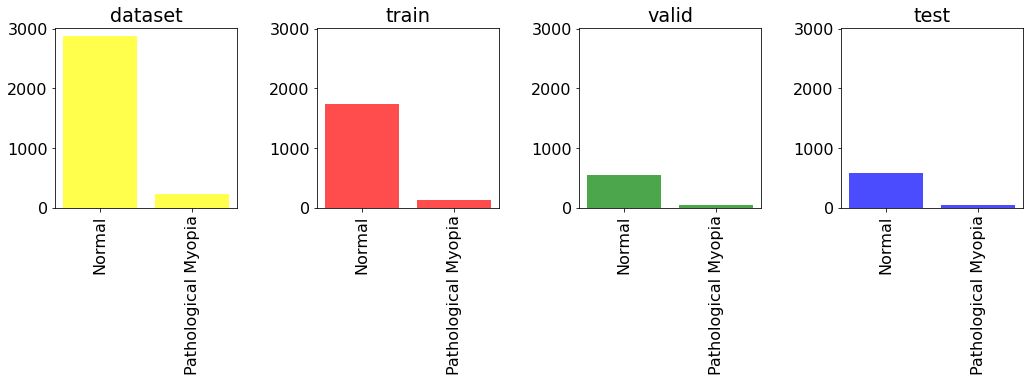

In [ ]:
dataframes_value_counts = plot_classes_distribution([myopia_df, train_df, valid_df, test_df], class_column='labels_descriptive', 
                          colors=['yellow', 'red', 'green', 'blue'], figure_title=None,  
                          plot_titles=['dataset', 'train', 'valid', 'test'], figsize=(15, 6), equal_y_scale=True, fig_output_path=None)

In [ ]:
project_path = '/content/drive/MyDrive/COLAB_NOTEBOOKS/Convolutional_Neural_Networks_Ophthalmology'
train_df.to_csv(os.path.join(project_path, 'myopia_train_df.csv'))
valid_df.to_csv(os.path.join(project_path, 'myopia_valid_df.csv'))
test_df.to_csv(os.path.join(project_path, 'myopia_test_df.csv'))